In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
plt.rcParams['font.family'] = 'Nimbus Sans'

In [34]:
xi_gn_p_results_rec = np.load('/home/murray/intrinsic_alignments/eboss_lrgpcmass_xi_gn_p_results_rec.npy')
xi_gn_x_results_rec = np.load('/home/murray/intrinsic_alignments/eboss_lrgpcmass_xi_gn_x_results_rec.npy')

xi_gn_p_results = np.load('/home/murray/intrinsic_alignments/eboss_lrgpcmass_xi_gn_p_results.npy')
xi_gn_x_results = np.load('/home/murray/intrinsic_alignments/eboss_lrgpcmass_xi_gn_x_results.npy')

lrg_xi_gn_p_results = np.load('/home/murray/intrinsic_alignments/lrg_xi_gn_p_results.npy')
lrg_xi_gn_x_results = np.load('/home/murray/intrinsic_alignments/lrg_xi_gn_x_results.npy')

elg_xi_gn_p_results = np.load('/home/murray/intrinsic_alignments/elg_xi_gn_p_results.npy')
elg_xi_gn_x_results = np.load('/home/murray/intrinsic_alignments/elg_xi_gn_x_results.npy')


In [51]:
def make_rsd_diagram( xi_gn_p_results ,
                      xi_gn_x_results  , 
                      rmin = 60 ,  
                      sigma = 2 , 
                      contourf = True , 
                      vmin = None ,
                      vmax = None ):


    # Apply Gaussian smoothing
    smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_results, sigma= sigma )
    smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_results, sigma= sigma )

    plt.figure(figsize=(10, 6))
    plt.subplot(121)
    if contourf:
        plt.contourf(smoothed_xi_gn_p_results, extent=[0, 200, -200, 200] , vmin = vmin , vmax = vmax )
    else:   
        plt.imshow(smoothed_xi_gn_p_results, extent=[0, 200, -200, 200] , vmin = vmin , vmax = vmax )

    plt.axis('equal')

    plt.xlim(  0 , rmin )
    plt.ylim( -rmin , rmin )
    plt.colorbar()
    plt.ylabel(r'$\pi$ [Mpc]', fontsize = 15 )
    plt.xlabel(r'$r_{\perp}$ [Mpc]', fontsize = 15 )
    plt.title(r'$\xi_{G+}(r_{\perp},\pi)$')
    plt.tight_layout()


    plt.subplot(122)
    if contourf:
        plt.contourf(smoothed_xi_gn_x_results, extent=[0, 200, -200, 200] , vmin = vmin , vmax = vmax )
    else:   
        plt.imshow(smoothed_xi_gn_x_results, extent=[0, 200, -200, 200] , vmin = vmin , vmax = vmax ) 
    plt.axis('equal')
   
    plt.xlim(  0 , rmin )
    plt.ylim( -rmin , rmin )
    plt.colorbar()
    plt.ylabel(r'$\pi$ [Mpc]', fontsize = 15 )
    plt.xlabel(r'$r_{\perp}$ [Mpc]', fontsize = 15 )
    plt.title(r'$\xi_{G\times}(r_{\perp},\pi)$')
    plt.tight_layout()


def reflect_make_rsd_diagram( xi_gn_p_results ,
                      xi_gn_x_results  , 
                      rmin = 60 ,  
                      sigma = 2 , 
                      contourf = True , 
                      vmin = None ,
                      vmax = None ):
    
    # Reflect the array about r_par = 0
    xi_gn_p_reflected = xi_gn_p_results[::-1, :]
    # Sum the original and reflected arrays
    xi_gn_p_summed = xi_gn_p_results + xi_gn_p_reflected
    # Divide by 2 to get the average
    xi_gn_p_avg = xi_gn_p_summed / 2

    # Reflect the array about r_par = 0
    xi_gn_x_reflected = xi_gn_x_results[::-1, :]
    # Sum the original and reflected arrays
    xi_gn_x_summed = xi_gn_x_results + xi_gn_x_reflected
    # Divide by 2 to get the average
    xi_gn_x_avg = xi_gn_x_summed / 2

    # Apply Gaussian smoothing
    smoothed_xi_gn_p_results = gaussian_filter(xi_gn_p_reflected, sigma= sigma )
    smoothed_xi_gn_x_results = gaussian_filter(xi_gn_x_reflected, sigma= sigma )

    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    if contourf:
        plt.contourf(smoothed_xi_gn_p_results, extent=[0, 200, -200, 200] , vmin = vmin , vmax = vmax )
    else:   
        plt.imshow(smoothed_xi_gn_p_results, extent=[0, 200, -200, 200] , vmin = vmin , vmax = vmax )
    plt.axis('equal')

    plt.xlim(  0 , rmin )
    plt.ylim( 0 , rmin )
    plt.colorbar()
    plt.ylabel(r'$\pi$ [Mpc]', fontsize = 15 )
    plt.xlabel(r'$r_{\perp}$ [Mpc]', fontsize = 15 )
    plt.title(r'$\xi_{G+}(r_{\perp},\pi)$')
    plt.tight_layout()


    plt.subplot(122)
    if contourf:
        plt.contourf(smoothed_xi_gn_x_results, extent=[0, 200, -200, 200] , vmin = vmin , vmax = vmax )
    else:   
        plt.imshow(smoothed_xi_gn_x_results, extent=[0, 200, -200, 200] , vmin = vmin , vmax = vmax )  
    plt.axis('equal')
  
    plt.xlim(  0 , rmin )
    plt.ylim( 0 , rmin )
    plt.colorbar()
    plt.ylabel(r'$\pi$ [Mpc]', fontsize = 15 )
    plt.xlabel(r'$r_{\perp}$ [Mpc]', fontsize = 15 )
    plt.title(r'$\xi_{G\times}(r_{\perp},\pi)$')
    plt.tight_layout()


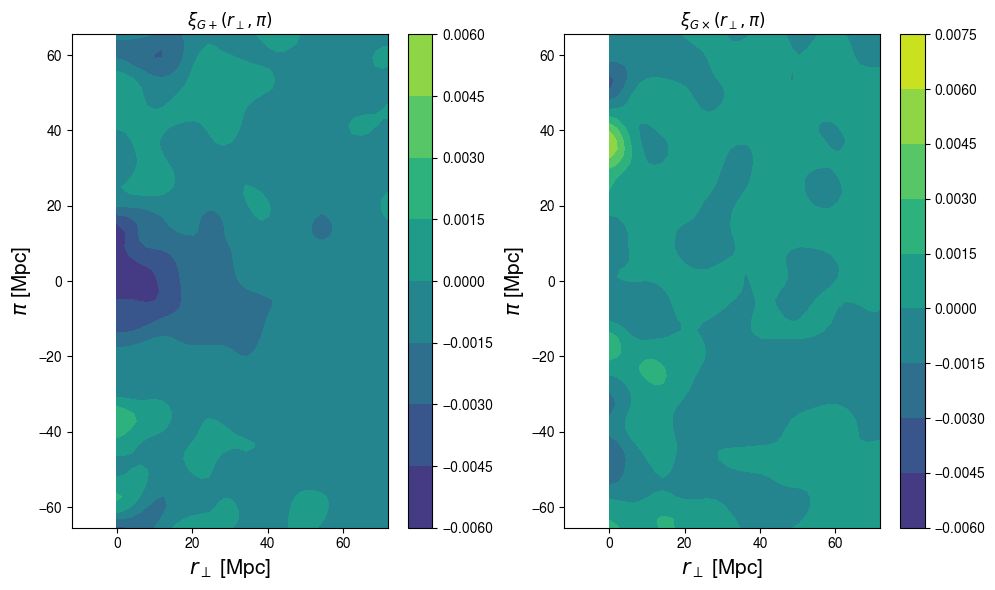

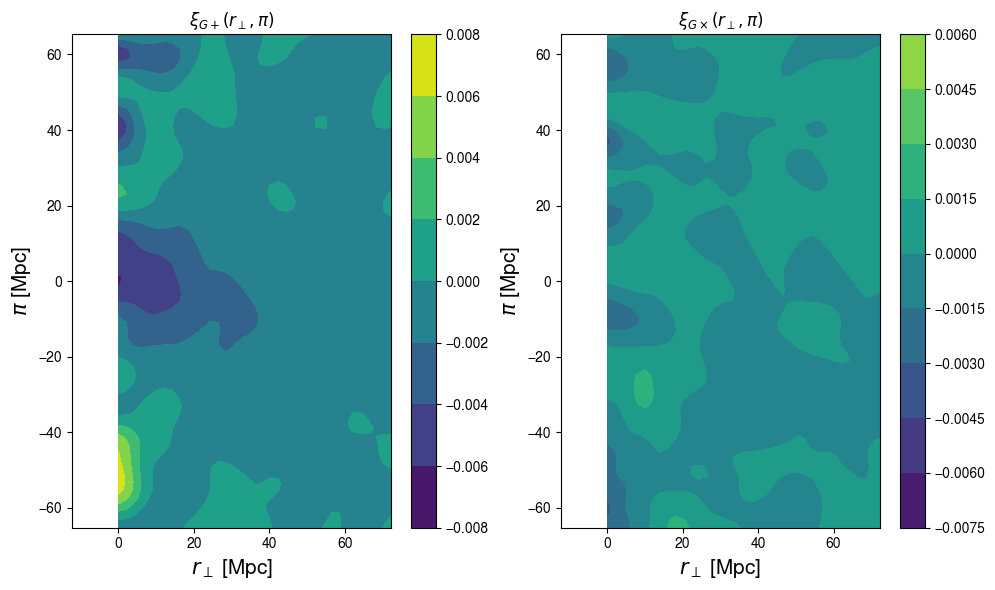

In [52]:
make_rsd_diagram( xi_gn_p_results , xi_gn_x_results , vmin = -8e-3 , vmax = 8e-3 )
make_rsd_diagram( xi_gn_p_results_rec , xi_gn_x_results_rec , vmin = -8e-3 , vmax = 8e-3 )

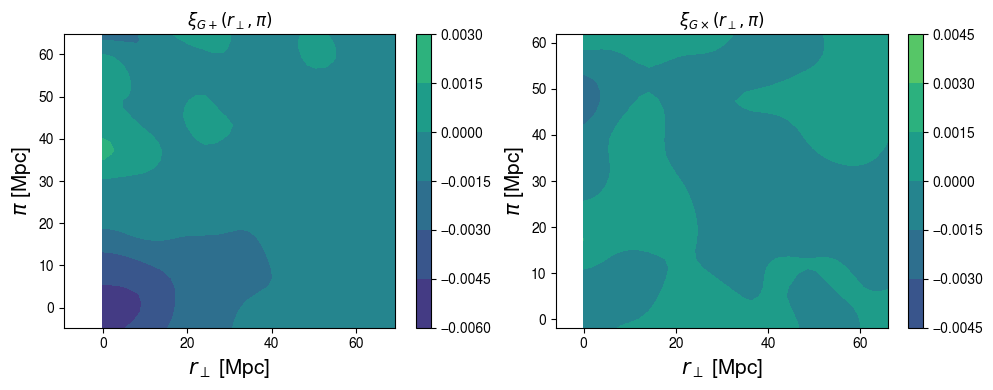

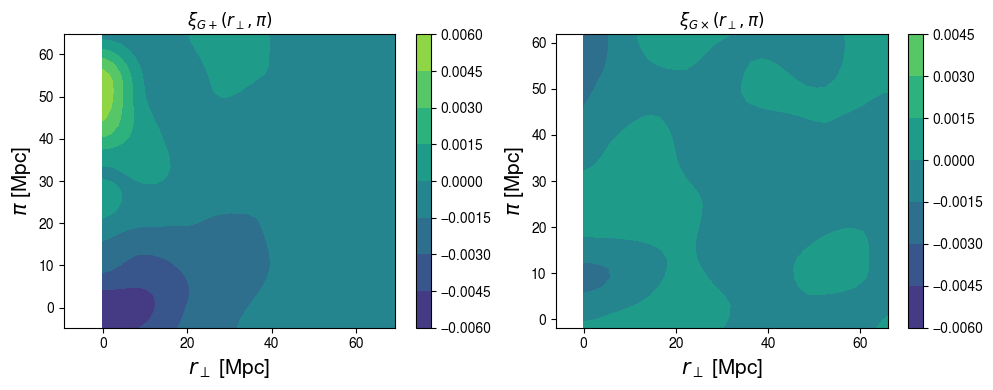

In [53]:
reflect_make_rsd_diagram( xi_gn_p_results , xi_gn_x_results , vmin = -8e-3 , vmax = 8e-3 , sigma = 2.5)
reflect_make_rsd_diagram( xi_gn_p_results_rec , xi_gn_x_results_rec , vmin = -8e-3 , vmax = 8e-3 , sigma = 2.5)

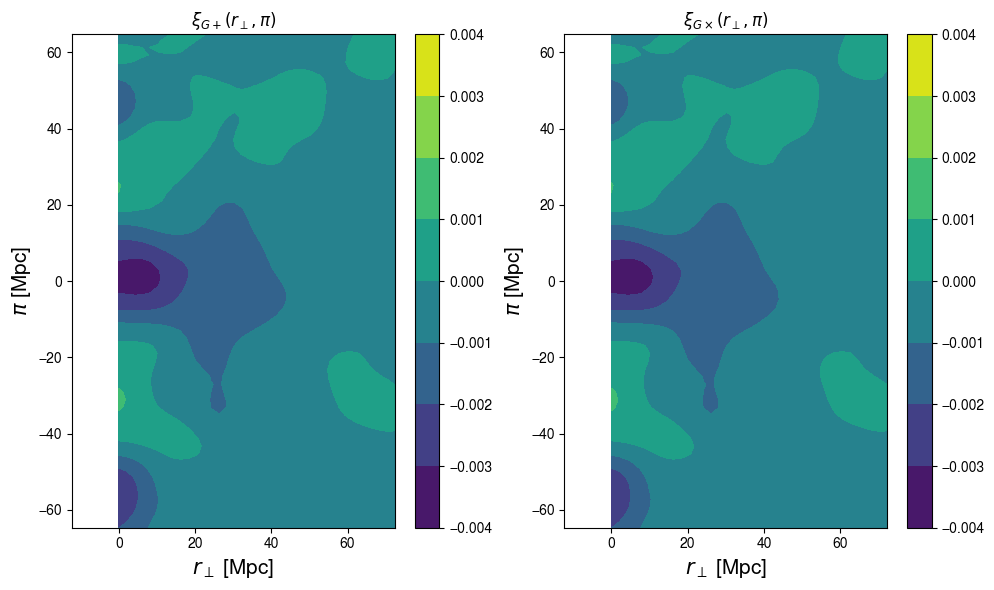

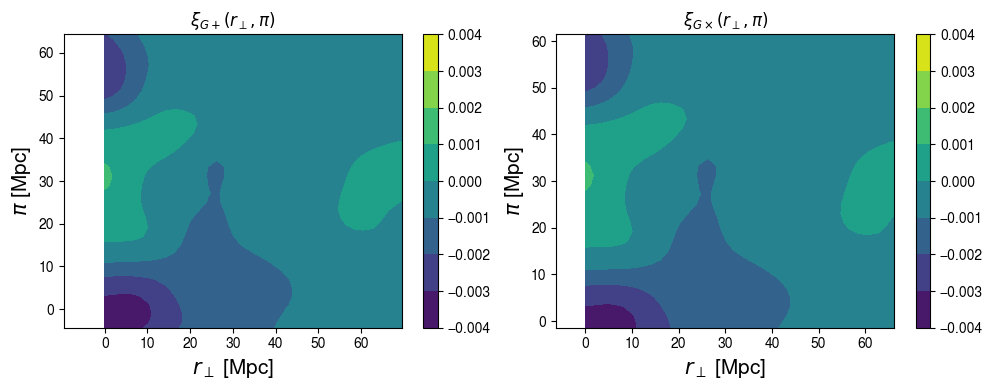

In [54]:
make_rsd_diagram( lrg_xi_gn_p_results , lrg_xi_gn_x_results , vmin = None , vmax = None , sigma = 2.5 )
reflect_make_rsd_diagram( lrg_xi_gn_p_results , lrg_xi_gn_x_results , vmin = None , vmax = None  , sigma = 2.5 )

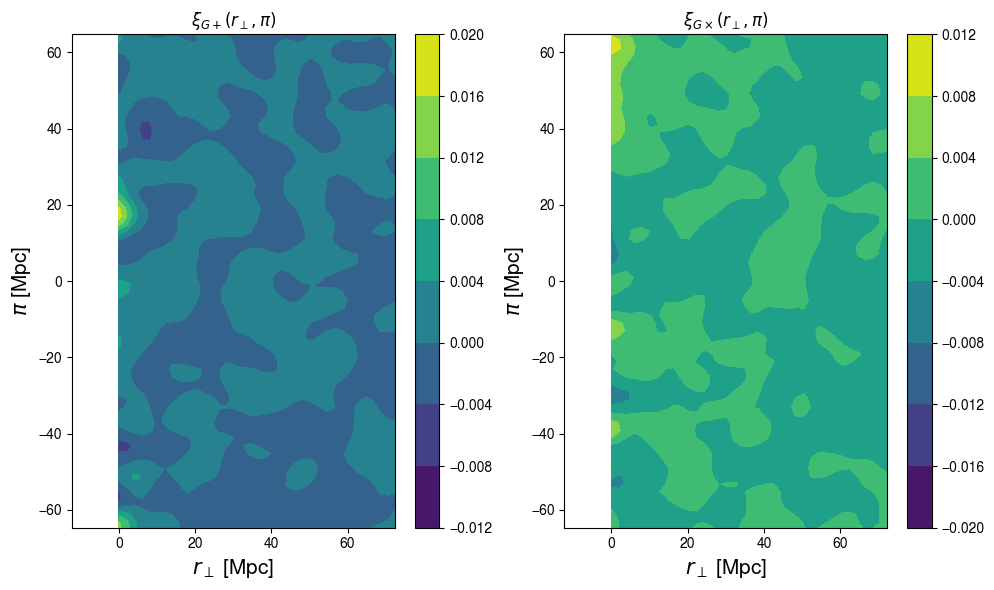

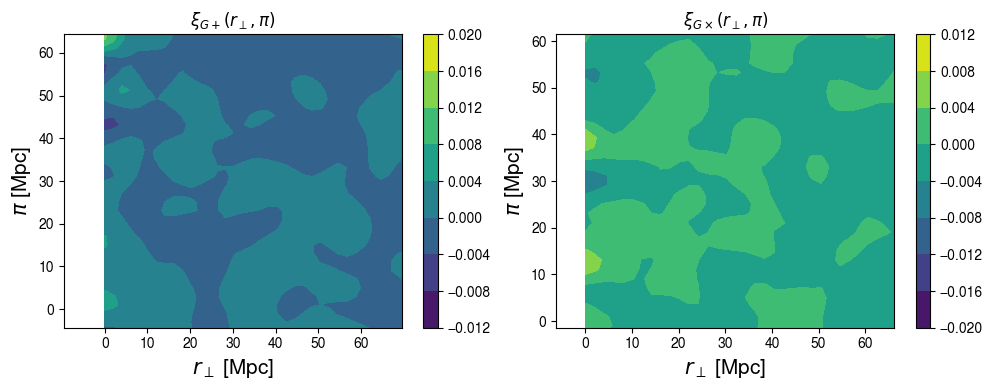

In [55]:
make_rsd_diagram( elg_xi_gn_p_results , elg_xi_gn_x_results , vmin = None , vmax = None , sigma = 1.5 )
reflect_make_rsd_diagram( elg_xi_gn_p_results , elg_xi_gn_x_results , vmin = None , vmax = None  , sigma= 1.5 )

In [40]:
def monopole(  xi_gn_p , xi_gn_x , s_bins , r_perp_flat , r_par_flat ):

    xi_gn_p_flat = xi_gn_p.flatten()
    xi_gn_x_flat = xi_gn_x.flatten()

    # Calculate s for each pair of (r_perp, r_par)
    s = np.sqrt(r_perp_flat**2 + r_par_flat**2)

    s_cents = ( s_bins[1:] + s_bins[:-1] )/2.

    # Initialize arrays to store the results
    xi_p_s = np.zeros(len(s_bins) - 1)
    var_xi_p_s = np.zeros(len(s_bins) - 1)
    counts_p = np.zeros(len(s_bins) - 1)

    xi_x_s = np.zeros(len(s_bins) - 1)
    var_xi_x_s = np.zeros(len(s_bins) - 1)
    counts_x = np.zeros(len(s_bins) - 1)

    # Bin the results by s and calculate the radial averages and variances
    for i in range(len(s_bins) - 1):
        mask = (s >= s_bins[i]) & (s < s_bins[i + 1])
        if np.any(mask):  # Check if there are any elements in the mask
            xi_p_s[i] = np.mean(xi_gn_p_flat[mask])
            var_xi_p_s[i] = np.var(xi_gn_p_flat[mask])
            counts_p[i] = np.sum(mask)

            xi_x_s[i] = np.mean(xi_gn_x_flat[mask])
            var_xi_x_s[i] = np.var(xi_gn_x_flat[mask])
            counts_x[i] = np.sum(mask)


    return xi_p_s , var_xi_p_s , counts_p , xi_x_s , var_xi_x_s , counts_x , s_cents

In [41]:
# Define the range and number of bins for rpar
rpar_bins = np.linspace(-200, 200, 201 )  
rperp_bins = np.linspace(0.5, 200, 101 )

r_perp_cents = (rperp_bins[1:] + rperp_bins[:-1]) / 2
r_par_cents = (rpar_bins[1:] + rpar_bins[:-1]) / 2

r_perp_flat = np.array([r_perp_cents] * len(r_par_cents)).flatten()
r_par_flat = np.array([[r_par] * len(r_perp_cents) for r_par in r_par_cents]).flatten()


In [24]:
sbins = np.logspace( 0 , np.log10( 200 ) , 15 )
# sbins = np.linspace( 0.1 , 200 , 25 )

In [25]:
xi_p_s , var_xi_p_s , counts_p , xi_x_s , var_xi_x_s , counts_x , s_cents = monopole( xi_gn_p_results , xi_gn_x_results , sbins , r_perp_flat , r_par_flat )
xi_p_s_rec , var_xi_p_s_rec , counts_p , xi_x_s_rec , var_xi_x_s_rec , counts_x , s_cents = monopole( xi_gn_p_results_rec , xi_gn_x_results_rec , sbins , r_perp_flat , r_par_flat )

In [26]:
lrg_xi_p_s , lrg_var_xi_p_s , counts_p , lrg_xi_x_s , lrg_var_xi_x_s , counts_x , s_cents = monopole( lrg_xi_gn_p_results ,
                                                                                                      lrg_xi_gn_x_results , 
                                                                                                      sbins , r_perp_flat , r_par_flat )

In [42]:
elg_xi_p_s , elg_var_xi_p_s , counts_p , elg_xi_x_s , elg_var_xi_x_s , counts_x , s_cents = monopole( elg_xi_gn_p_results ,
                                                                                                      elg_xi_gn_x_results , 
                                                                                                      sbins , r_perp_flat , r_par_flat )

In [43]:
h = 0.7

/tmp/ipykernel_190256/1181178878.py:5: RuntimeWarning: invalid value encountered in divide
  fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
/tmp/ipykernel_190256/1181178878.py:8: RuntimeWarning: invalid value encountered in divide
  fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )


(50.0, 150.0)

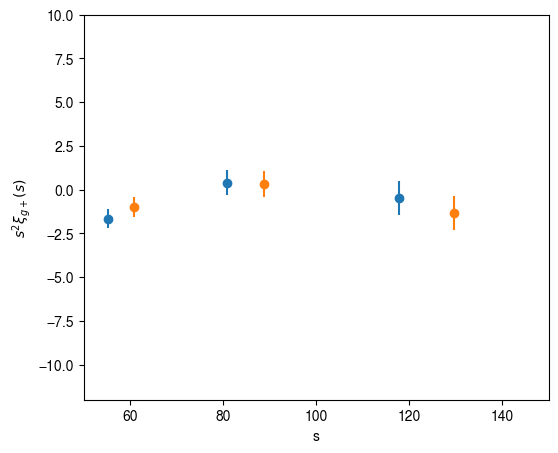

In [44]:
plt.figure( figsize=(6,5))
# plt.subplot(211)
plt.errorbar( s_cents * h  , 
              xi_p_s * s_cents**2,
              fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
plt.errorbar( s_cents*1.1 * h ,
              xi_p_s_rec * s_cents**2,
              fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
plt.xlabel('s')
plt.ylabel(r'$s^2 \xi_{g+}(s)$')
plt.ylim(-12,10)
plt.xlim( 50 , 150 )
#plt.xscale('log')

# plt.subplot(212)
# plt.errorbar( s_cents * h ,
#               xi_p_s_rec * s_cents**2,
#               fmt='o' , yerr = var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5 )
# plt.xlabel('s')
# plt.ylabel(r'$s^2 \xi_{g+}(s)$')
# plt.ylim(-12,10)
# plt.xlim( 50 , 150 )
##plt.xscale('log')

/tmp/ipykernel_190256/4021804233.py:4: RuntimeWarning: invalid value encountered in divide
  fmt='ko' , yerr = var_xi_p_s**0.5  / counts_x**0.5,
/tmp/ipykernel_190256/4021804233.py:9: RuntimeWarning: invalid value encountered in divide
  yerr = var_xi_p_s**0.5 / counts_x**0.5 ,


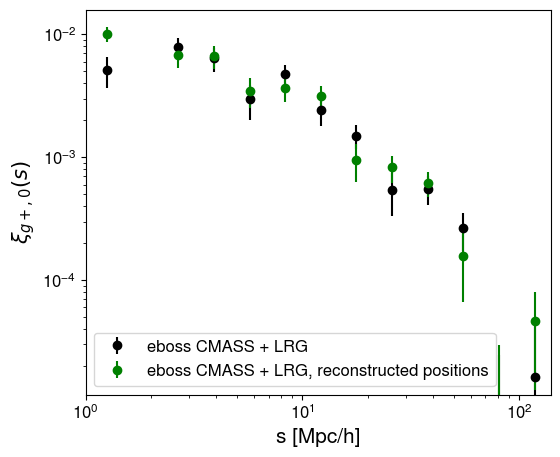

In [45]:
plt.figure( figsize=(6,5))
plt.errorbar( s_cents * h , 
              -xi_p_s ,
              fmt='ko' , yerr = var_xi_p_s**0.5  / counts_x**0.5,
              label = 'eboss CMASS + LRG' )
plt.errorbar( s_cents * h ,
              -xi_p_s_rec ,
              fmt='go' , 
              yerr = var_xi_p_s**0.5 / counts_x**0.5 ,
               label = 'eboss CMASS + LRG, reconstructed positions' )

# plt.errorbar( s_cents * h , 
#               lrg_xi_p_s ,
#               fmt='ro' , yerr = var_xi_p_s**0.5  / counts_x**0.5,
#               label = 'DESI LRG' )

plt.plot( [ 0 , 201 ] , [ 0 , 0 ] , 'k--' , alpha = 0.5 )
plt.xlabel('s [Mpc/h]' , fontsize = 15)
plt.ylabel(r'$\xi_{g+,0}(s)$' , fontsize = 15)
plt.xticks( fontsize = 12)
plt.yticks( fontsize = 12)
# plt.ylim(-12,10)
plt.xlim( np.min( s_cents * h ) * 0.9 , 150 )
plt.xscale('log')
plt.yscale('log')
plt.xlim( 1 , 140)
# plt.ylim( -0.01 , 0.001 )
plt.legend( fontsize = 12 )

/tmp/ipykernel_190256/2005179489.py:4: RuntimeWarning: invalid value encountered in divide
  fmt='ko' , yerr = var_xi_p_s**0.5  / counts_x**0.5,
/tmp/ipykernel_190256/2005179489.py:12: RuntimeWarning: invalid value encountered in divide
  fmt='ro' , yerr = var_xi_p_s**0.5  / counts_x**0.5,
/tmp/ipykernel_190256/2005179489.py:17: RuntimeWarning: invalid value encountered in divide
  fmt='bo' , yerr = var_xi_p_s**0.5  / counts_x**0.5,


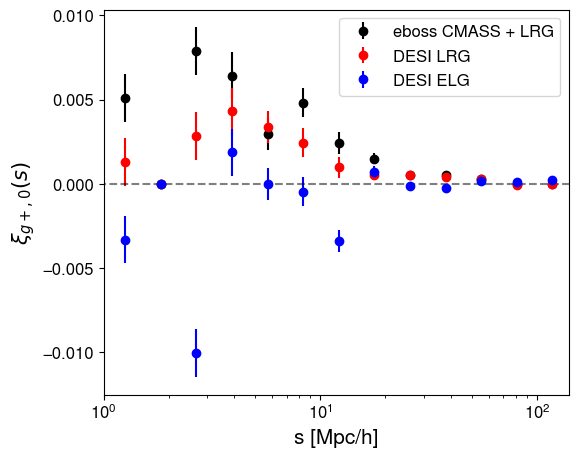

In [49]:
plt.figure( figsize=(6,5))
plt.errorbar( s_cents * h , 
              -xi_p_s ,
              fmt='ko' , yerr = var_xi_p_s**0.5  / counts_x**0.5,
              label = 'eboss CMASS + LRG' )
# plt.errorbar( s_cents * h ,
#               xi_p_s_rec ,
#               fmt='ko' , yerr = var_xi_p_s**0.5 / counts_x**0.5 )

plt.errorbar( s_cents * h , 
              -lrg_xi_p_s ,
              fmt='ro' , yerr = var_xi_p_s**0.5  / counts_x**0.5,
              label = 'DESI LRG' )

plt.errorbar( s_cents * h , 
              -elg_xi_p_s ,
              fmt='bo' , yerr = var_xi_p_s**0.5  / counts_x**0.5,
              label = 'DESI ELG' )

plt.plot( [ 0 , 201 ] , [ 0 , 0 ] , 'k--' , alpha = 0.5 )
plt.xlabel('s [Mpc/h]' , fontsize = 15)
plt.ylabel(r'$\xi_{g+,0}(s)$' , fontsize = 15)
plt.xticks( fontsize = 12)
plt.yticks( fontsize = 12)
# plt.ylim(-12,10)
plt.xlim( np.min( s_cents * h ) * 0.9 , 150 )
plt.xscale('log')
#plt.yscale('log')
plt.xlim( 1 , 140)
# plt.ylim( -0.01 , 0.001 )
plt.legend( fontsize = 12 )

/tmp/ipykernel_190256/1219032867.py:4: RuntimeWarning: invalid value encountered in divide
  fmt='ko' , yerr = var_xi_p_s**0.5  / counts_x**0.5,


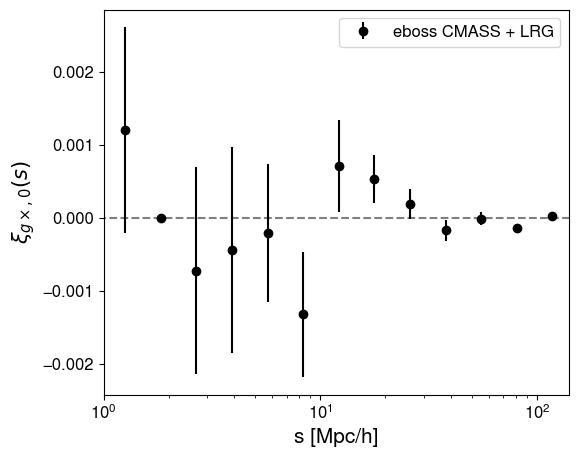

In [33]:
plt.figure( figsize=(6,5))
plt.errorbar( s_cents * h , 
              xi_x_s ,
              fmt='ko' , yerr = var_xi_p_s**0.5  / counts_x**0.5,
              label = 'eboss CMASS + LRG' )
# plt.errorbar( s_cents * h ,
#               xi_p_s_rec ,
#               fmt='ko' , yerr = var_xi_p_s**0.5 / counts_x**0.5 )

# plt.errorbar( s_cents * h , 
#               lrg_xi_x_s ,
#               fmt='ro' , yerr = var_xi_p_s**0.5  / counts_x**0.5,
#               label = 'DESI LRG' )

plt.plot( [ 0 , 201 ] , [ 0 , 0 ] , 'k--' , alpha = 0.5 )
plt.xlabel('s [Mpc/h]' , fontsize = 15)
plt.ylabel(r'$\xi_{g\times,0}(s)$' , fontsize = 15)
plt.xticks( fontsize = 12)
plt.yticks( fontsize = 12)
# plt.ylim(-12,10)
plt.xlim( np.min( s_cents * h ) * 0.9 , 150 )
plt.xscale('log')
plt.xlim( 1 , 140)
#plt.ylim( -0.01 , 0.001 )
plt.legend( fontsize = 12 )

In [59]:
def quadrupole(xi_gn_p, xi_gn_x, s_bins, r_perp_flat, r_par_flat):
    """
    Measure the quadrupole moment of the correlation function.

    Parameters:
    xi_gn_p : ndarray
        The xi_gn_p array (real part of the correlation function).
    xi_gn_x : ndarray
        The xi_gn_x array (imaginary part of the correlation function).
    s_bins : ndarray
        The bins for the separation s.
    r_perp_flat : ndarray
        Flattened array of perpendicular separations.
    r_par_flat : ndarray
        Flattened array of parallel separations.

    Returns:
    xi_p_quad : ndarray
        Quadrupole moment for the real part.
    var_xi_p_quad : ndarray
        Variance of the quadrupole moment for the real part.
    counts_p_quad : ndarray
        Counts for the real part.
    xi_x_quad : ndarray
        Quadrupole moment for the imaginary part.
    var_xi_x_quad : ndarray
        Variance of the quadrupole moment for the imaginary part.
    counts_x_quad : ndarray
        Counts for the imaginary part.
    s_cents : ndarray
        Centers of the separation bins.
    """
    xi_gn_p_flat = xi_gn_p.flatten()
    xi_gn_x_flat = xi_gn_x.flatten()

    # Calculate s and mu for each pair of (r_perp, r_par)
    s = np.sqrt(r_perp_flat**2 + r_par_flat**2)
    mu = r_par_flat / s

    s_cents = (s_bins[1:] + s_bins[:-1]) / 2.

    # Initialize arrays to store the results
    xi_p_quad = np.zeros(len(s_bins) - 1)
    var_xi_p_quad = np.zeros(len(s_bins) - 1)
    counts_p_quad = np.zeros(len(s_bins) - 1)

    xi_x_quad = np.zeros(len(s_bins) - 1)
    var_xi_x_quad = np.zeros(len(s_bins) - 1)
    counts_x_quad = np.zeros(len(s_bins) - 1)

    # Bin the results by s and calculate the quadrupole moments
    for i in range(len(s_bins) - 1):
        mask = (s >= s_bins[i]) & (s < s_bins[i + 1])
        if np.any(mask):  # Check if there are any elements in the mask
            legendre_quad = (3 * mu[mask]**2 - 1) / 2  # Quadrupole Legendre polynomial

            xi_p_quad[i] = np.mean(xi_gn_p_flat[mask] * legendre_quad)
            var_xi_p_quad[i] = np.var(xi_gn_p_flat[mask] * legendre_quad)
            counts_p_quad[i] = np.sum(mask)

            xi_x_quad[i] = np.mean(xi_gn_x_flat[mask] * legendre_quad)
            var_xi_x_quad[i] = np.var(xi_gn_x_flat[mask] * legendre_quad)
            counts_x_quad[i] = np.sum(mask)

    return xi_p_quad, var_xi_p_quad, counts_p_quad, xi_x_quad, var_xi_x_quad, counts_x_quad, s_cents

In [60]:
quad_eboss_xi_p_s , quad_eboss_var_xi_p_s , counts_p , quad_eboss_xi_x_s , quad_eboss_var_xi_x_s , counts_x , s_cents = quadrupole( xi_gn_p_results ,
                                                                                                      xi_gn_x_results , 
                                                                                                      sbins , r_perp_flat , r_par_flat )
quad_eboss_xi_p_s_rec , quad_eboss_var_xi_p_s , counts_p , quad_eboss_xi_x_s , quad_eboss_var_xi_x_s , counts_x , s_cents = quadrupole( xi_gn_p_results_rec ,
                                                                                                        xi_gn_x_results_rec , 
                                                                                                        sbins , r_perp_flat , r_par_flat )

quad_lrg_xi_p_s , quad_lrg_var_xi_p_s , counts_p , quad_lrg_xi_x_s , quad_lrg_var_xi_x_s , counts_x , s_cents = quadrupole( lrg_xi_gn_p_results ,
                                                                                                      lrg_xi_gn_x_results , 
                                                                                                      sbins , r_perp_flat , r_par_flat )

In [64]:
plt.figure( figsize=(6,5))

plt.errorbar( s_cents * h , 
              quad_eboss_xi_p_s * s_cents**2 ,
              fmt='ko' , yerr = quad_eboss_var_xi_p_s**0.5 * s_cents**2  / counts_x**0.5,
              label = 'eBOSS CMASS + LRG' )

plt.errorbar( s_cents * h , 
              quad_eboss_xi_p_s_rec  * s_cents**2,
              fmt='go' , yerr = quad_eboss_var_xi_p_s**0.5  * s_cents**2 / counts_x**0.5,
              label = 'eBOSS CMASS + LRG, reconstructed' )
# plt.errorbar( s_cents * h ,
#               xi_p_s_rec ,
#               fmt='ko' , yerr = var_xi_p_s**0.5 / counts_x**0.5 )

# plt.errorbar( s_cents * h * 1.1 , 
#               quad_lrg_xi_p_s ,
#               fmt='ro' , yerr = quad_lrg_var_xi_p_s**0.5  / counts_x**0.5,
#               label = 'DESI LRG' )

plt.plot( [ 0 , 201 ] , [ 0 , 0 ] , 'k--' , alpha = 0.5 )
plt.xlabel('s [Mpc/h]' , fontsize = 15)
plt.ylabel(r'$\xi_{g+,2}(s)$' , fontsize = 15)
plt.xticks( fontsize = 12)
plt.yticks( fontsize = 12)
# plt.ylim(-12,10)
plt.xlim( np.min( s_cents * h ) * 0.9 , 150 )
# plt.xscale('log')
plt.xlim( 1 , 140)
#plt.ylim( -0.003 , 0.0015 )
plt.legend( fontsize = 12 )

In [66]:
plt.figure( figsize=(6,5))

plt.errorbar( s_cents * h , 
              quad_eboss_xi_p_s  ,
              fmt='ko' , yerr = quad_eboss_var_xi_p_s**0.5   / counts_x**0.5,
              label = 'eBOSS CMASS + LRG' )

plt.errorbar( s_cents * h , 
              quad_eboss_xi_p_s_rec  ,
              fmt='go' , yerr = quad_eboss_var_xi_p_s**0.5   / counts_x**0.5,
              label = 'eBOSS CMASS + LRG, reconstructed' )
# plt.errorbar( s_cents * h ,
#               xi_p_s_rec ,
#               fmt='ko' , yerr = var_xi_p_s**0.5 / counts_x**0.5 )

# plt.errorbar( s_cents * h * 1.1 , 
#               quad_lrg_xi_p_s ,
#               fmt='ro' , yerr = quad_lrg_var_xi_p_s**0.5  / counts_x**0.5,
#               label = 'DESI LRG' )

plt.plot( [ 0 , 201 ] , [ 0 , 0 ] , 'k--' , alpha = 0.5 )
plt.xlabel('s [Mpc/h]' , fontsize = 15)
plt.ylabel(r'$\xi_{g+,2}(s)$' , fontsize = 15)
plt.xticks( fontsize = 12)
plt.yticks( fontsize = 12)
# plt.ylim(-12,10)
plt.xlim( np.min( s_cents * h ) * 0.9 , 150 )
# plt.xscale('log')
plt.xlim( 1 , 140)
#plt.ylim( -0.003 , 0.0015 )
plt.legend( fontsize = 12 )

In [67]:
plt.figure( figsize=(6,5))

plt.errorbar( s_cents * h , 
              quad_eboss_xi_x_s ,
              fmt='ko' , yerr = quad_eboss_var_xi_p_s**0.5  / counts_x**0.5,
              label = 'eBOSS CMASS + LRG' )
# plt.errorbar( s_cents * h ,
#               xi_p_s_rec ,
#               fmt='ko' , yerr = var_xi_p_s**0.5 / counts_x**0.5 )

plt.errorbar( s_cents * h * 1.1 , 
              quad_lrg_xi_x_s ,
              fmt='ro' , yerr = quad_lrg_var_xi_p_s**0.5  / counts_x**0.5,
              label = 'DESI LRG' )

plt.plot( [ 0 , 201 ] , [ 0 , 0 ] , 'k--' , alpha = 0.5 )
plt.xlabel('s [Mpc/h]' , fontsize = 15)
plt.ylabel(r'$\xi_{g\times,2}(s)$' , fontsize = 15)
plt.xticks( fontsize = 12)
plt.yticks( fontsize = 12)
# plt.ylim(-12,10)
plt.xlim( np.min( s_cents * h ) * 0.9 , 150 )
#plt.xscale('log')
plt.xlim( 1 , 140)
plt.ylim( -0.003 , 0.0015 )
plt.legend( fontsize = 12 )